In [10]:
import numpy as np
import matplotlib.pyplot as plt
import pandas as pd
from src.utils import destandardize
%matplotlib inline

In [11]:
SAVE_PATH = 'results/base'
info_csv = 'data/AAPL/1d_info.csv'
df = pd.read_csv(info_csv, index_col=0)

In [12]:
min_, max_ = df['close']['min'], df['close']['max']

In [13]:
prevs = np.load(f'{SAVE_PATH}/prevs.npy')
preds = np.load(f'{SAVE_PATH}/preds.npy')
targets = np.load(f'{SAVE_PATH}/targets.npy')
print(f'Previous shape: {prevs.shape}')
print(f'Predicted shape: {preds.shape}')
print(f'Targets shape: {targets.shape}')

Previous shape: (619, 96)
Predicted shape: (619, 24, 1)
Targets shape: (619, 24, 1)


In [14]:
prevs = np.exp(destandardize(prevs, min_, max_ - min_))
preds = np.exp(destandardize(preds.squeeze(), min_, max_ - min_))
targets = np.exp(destandardize(targets.squeeze(), min_, max_ - min_))
print(f'Previous shape: {prevs.shape}')
print(f'Predicted shape: {preds.shape}')
print(f'Targets shape: {targets.shape}')

Previous shape: (619, 96)
Predicted shape: (619, 24)
Targets shape: (619, 24)


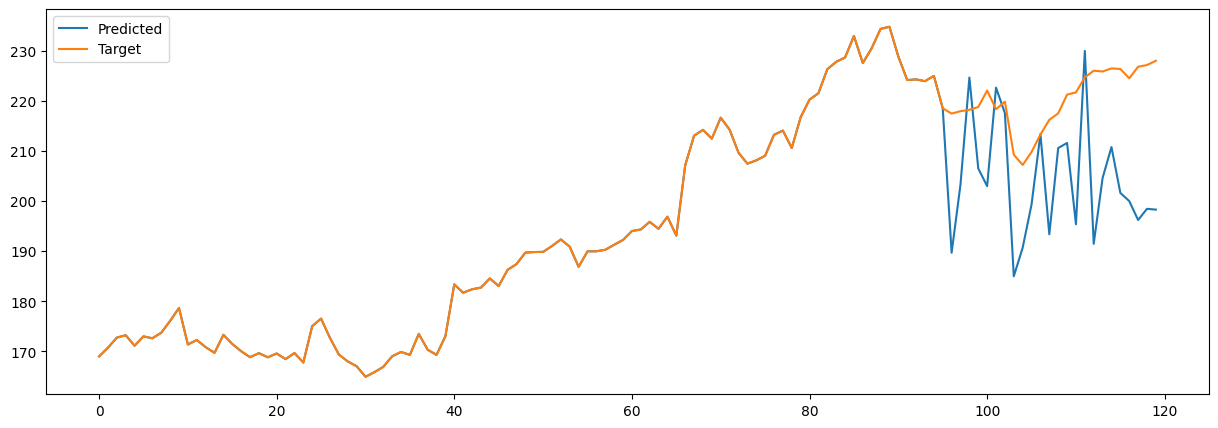

In [15]:
idx = np.random.randint(0, prevs.shape[0])
plt.figure(figsize=(15, 5))
plt.plot(np.concatenate([prevs[idx], preds[idx]]), label='Predicted')
plt.plot(np.concatenate([prevs[idx], targets[idx]]), label='Target')
plt.legend()

In [18]:
pred_arr, true_arr = [], []
for i in range(619 // 24):
    pred_arr.append(preds[i*24])
    true_arr.append(targets[i*24])
pred_arr = np.array(pred_arr).reshape(-1)
true_arr = np.array(true_arr).reshape(-1)
pred_arr.shape, true_arr.shape

((600,), (600,))

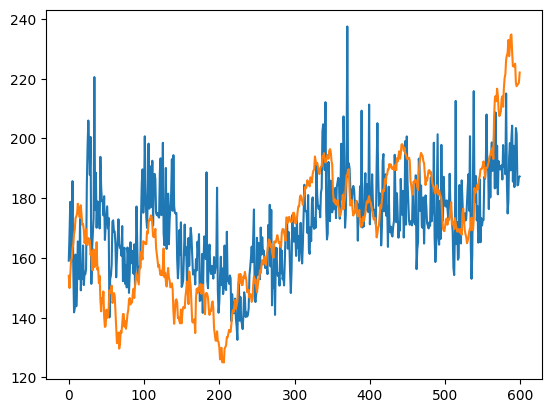

In [19]:
plt.plot(pred_arr, label='Predicted')
plt.plot(true_arr, label='Target')